# RNN with Word2Vec

- 'SimpleRNN_Test_Code_CPU.ipynb' 참고 
- https://wikidocs.net/22894 참고
- https://katie0809.github.io/2020/02/17/ai-study4/ 참고





> ## 1. 전처리 패키지(Khaiii) Import

In [ ]:
!git clone https://github.com/kakao/khaiii.git

fatal: destination path 'khaiii' already exists and is not an empty directory.


In [ ]:
!pip install cmake

In [ ]:
!mkdir build

mkdir: cannot create directory ‘build’: File exists


In [ ]:
!cd build && cmake /content/khaiii

-- [khaiii] fused multiply add option enabled
-- [hunter] Calculating Toolchain-SHA1
-- [hunter] Calculating Config-SHA1
-- [hunter] HUNTER_ROOT: /root/.hunter
-- [hunter] [ Hunter-ID: 70287b1 | Toolchain-ID: 02ccb06 | Config-ID: dffbc08 ]
-- [hunter] BOOST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.68.0-p1)
-- Boost version: 1.68.0
-- [hunter] CXXOPTS_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 2.1.1-pre)
-- [hunter] EIGEN_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.5)
-- [hunter] FMT_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 4.1.0)
-- [hunter] GTEST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.8.0-hunter-p11)
-- [hunter] NLOHMANN_JSON_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.0)
-- [hunter] SPDLOG_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 0.16.3-p1)
-- Configuring done
-- Generating done
-- Build files have been written t

In [ ]:
!cd /content/build/ && make all

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii


In [ ]:
!cd /content/build/ && make resource

Built target resource


In [ ]:
!cd /content/build && make install

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii
Install the project...
-- Install configuration: ""
-- Up-to-date: /usr/local/include/khaiii
-- Up-to-date: /usr/local/include/khaiii/khaiii_api.h
-- Up-to-date: /usr/local/include/khaiii/KhaiiiApi.hpp
-- Up-to-date: /usr/local/include/khaiii/khaiii_dev.h
-- Up-to-date: /usr/local/share/khaiii
-- Up-to-date: /usr/local/share/khaiii/conv.2.fil
-- Up-to-date: /usr/local/share/khaiii/cnv2hdn.lin
-- Up-to-date: /usr/local/share/khaiii/conv.3.fil
-- Up-to-date: /usr/local/share/khaiii/embed.bin
-- Up-to-date: /usr/local/share/khaiii/restore.key
-- Up-to-date: /usr/local/share/khaiii/conv.5.fil
-- Up-to-date: /usr/local/share/khaiii/preanal.tri
-- Up-to-date: /usr/local/share/khaiii/restore.val
-- Up-to-date: /usr/local/share/khaiii/config.json
-- Up-to-date: /usr/local/share/khaiii/errpatch.tri
-- Up-to-date: /usr/local/share/khaiii/conv.4.fil
-- Up-to-date: /usr/local/sh

In [ ]:
!cd /content/build && make package_python

Run CPack packaging tool for source...
CPack: Create package using ZIP
CPack: Install projects
CPack: - Install directory: /content/khaiii
CPack: Create package
CPack: - package: /content/build/khaiii-0.4.zip generated.
Built target package_python


In [ ]:
!pip install /content/build/package_python

Processing ./build/package_python
  Created wheel for khaiii: filename=khaiii-0.4-cp37-none-any.whl size=22883763 sha256=d53b1fc8e19db98fb123eda89d22a02ac26eea46a4f6b6a7cdda80847a72f10a
  Stored in directory: /tmp/pip-ephem-wheel-cache-rb7ih5t7/wheels/6b/4d/23/84c4acc3ef5226ca75c4e3ad84c39a0654d11c3a9c1941193f
Successfully built khaiii
  Found existing installation: khaiii 0.4
    Uninstalling khaiii-0.4:
      Successfully uninstalled khaiii-0.4


In [ ]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

> ## 2. 한글 폰트 설치

- 나눔폰트 설치

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

- 설치 확인

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/t

In [ ]:
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


- 적용하려면 '런타임 다시 시작' 진행

Text(0.5, 1.0, '안녕')

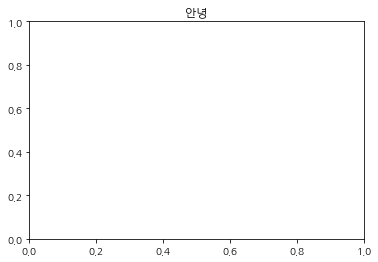

In [ ]:
plt.title('안녕')
# '안녕' 출력 확인

> ## 3. 데이터 불러오기



- dataset_final_Revise.xlsx

In [ ]:
import pandas as pd

df = pd.read_excel('dataset_final_Revise.xlsx', engine='openpyxl') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40644 entries, 0 to 40643
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sentence     40644 non-null  object 
 1   Emotion      40644 non-null  object 
 2   Unnamed: 2   0 non-null      float64
 3   Unnamed: 3   3 non-null      object 
 4   Unnamed: 4   3 non-null      object 
 5   Unnamed: 5   3 non-null      object 
 6   Unnamed: 6   3 non-null      object 
 7   Unnamed: 7   3 non-null      object 
 8   Unnamed: 8   3 non-null      object 
 9   Unnamed: 9   3 non-null      object 
 10  Unnamed: 10  3 non-null      object 
dtypes: float64(1), object(10)
memory usage: 3.4+ MB


In [ ]:
df = df.loc[:,['Sentence', 'Emotion']]
df.head()

,Sentence,Emotion
0,게임방 가서 사광 클릭해서 대기 4600명 뚫고 성공,행복
1,신곡 지붕킥 하자,행복
2,VR로 즐길 듯 기대되네,행복
3,뒷북 꿀 잼,행복
4,굿 꿩 먹고 알 먹고 누이 좋고 매부 좋고,행복


In [ ]:
df['Emotion'] = df['Emotion'].replace(['공포','놀람','분노','슬픔','중립','혐오','행복'],[0,1,2,3,4,5,6])

In [ ]:
df.head()

,Sentence,Emotion
0,게임방 가서 사광 클릭해서 대기 4600명 뚫고 성공,6
1,신곡 지붕킥 하자,6
2,VR로 즐길 듯 기대되네,6
3,뒷북 꿀 잼,6
4,굿 꿩 먹고 알 먹고 누이 좋고 매부 좋고,6


In [ ]:
df.tail()

,Sentence,Emotion
40639,아무래도 너와는 음식의 방향성이 안 맞을 거 같아.,4
40640,음식 뿐만이 아닐텐데?,4
40641,"그나저나 그 밧줄, 어떻게 할 거야? 자살은 안 한다고 했지? 장난이라고 했잖아.",4
40642,"장난, 이긴 한데 나는 아마 그 결과를 못 볼거야. 그래서 네가 대신 확인해줬으면 ...",4
40643,어떤 장난이길래?,4


In [ ]:
print('총 샘플 수 : ', len(df))

총 샘플 수 :  40644


In [ ]:
# 중복 없는 문장 확인
df.nunique()

Sentence    39275
Emotion         7
dtype: int64

In [ ]:
# 중복 문장 제거 -> 369문장 삭제 됨
df.drop_duplicates(subset = ['Sentence'], inplace = True)
len(df)

39275

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39275 entries, 0 to 40643
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  39275 non-null  object
 1   Emotion   39275 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 920.5+ KB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

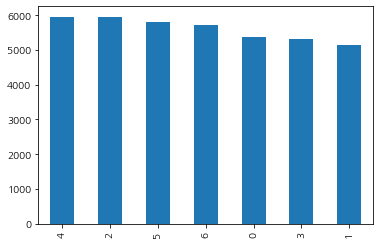

In [ ]:
df['Emotion'].value_counts().plot(kind = 'bar');

- X, y 분리
   - 'Sentence' -> X
   - 'Emotion' -> y

In [ ]:
X_data = df['Sentence']
y_data = df['Emotion']

In [ ]:
print(type(X_data))

<class 'pandas.core.series.Series'>


> ## 4. 카이 토큰화(형태소 분석) & Word2Vec & 정수 인코딩 수행

> ### 1) 카이 토큰화

In [ ]:
def khaiii_tokenized(s):
  result = []                         # def 밑에 있어야 문장별로 리스트가 따로 들어간다 
  for word in api.analyze(s):
    for morph in word.morphs:
      result.append(morph.lex)
  return result

In [ ]:
X_data_tokenized = X_data.apply(khaiii_tokenized)

In [ ]:
X_data_tokenized

0        [게임방, 가, 아서, 사광, 클릭, 하, 여서, 대기, 4600, 명, 뚫, 고,...
1                                          [신곡, 지붕킥, 하, 자]
2                              [VR, 로, 즐기, ㄹ, 듯, 기대, 되, 네]
3                                               [뒷북, 꿀, 잼]
4                [굿, 꿩, 먹, 고, 알, 먹, 고, 누이, 좋, 고, 매부, 좋, 고]
                               ...                        
40639    [아무래도, 너, 와, 는, 음식, 의, 방향, 성, 이, 안, 맞, 을, 거, 같...
40640                    [음식, 뿐, 만, 이, 아니, ㄹ, 터, 이, ㄴ데, ?]
40641    [그나저나, 그, 밧줄, ,, 어떻, 게, 하, ㄹ, 거, 이, 야, ?, 자살, ...
40642    [장난, ,, 이기, ㄴ, 하, ㄴ데, 나, 는, 아마, 그, 결과, 를, 못, 보...
40643                                   [어떤, 장난, 이, 길래, ?]
Name: Sentence, Length: 39275, dtype: object

In [ ]:
print(type(X_data_tokenized))

<class 'pandas.core.series.Series'>


- Series to List

In [ ]:
X_data_tokenized = X_data_tokenized.tolist()

In [ ]:
print(type(X_data_tokenized))

<class 'list'>


In [ ]:
X_data_tokenized

[['게임방', '가', '아서', '사광', '클릭', '하', '여서', '대기', '4600', '명', '뚫', '고', '성공'],
 ['신곡', '지붕킥', '하', '자'],
 ['VR', '로', '즐기', 'ㄹ', '듯', '기대', '되', '네'],
 ['뒷북', '꿀', '잼'],
 ['굿', '꿩', '먹', '고', '알', '먹', '고', '누이', '좋', '고', '매부', '좋', '고'],
 ['비', '좀', '와', '라', '좋', '은', '현상임', '굿굿'],
 ['나', 'ㄴ', '암전', '게임', '재밌', '었', '음', '재치', '있', '더라', '귀엽', '었', '음'],
 ['오', '선택', '잘', '하', '였', '다', '롱런하', '기', 'ㄹ'],
 ['커플', '대상', '응원', '하', 'ㅂ니다'],
 ['우리', '나', '란', '아직', '판매', '중', '희귀', '템', '구매원', '하', '면', '사면', '되', 'ㅁ'],
 ['하드캐리', '♡'],
 ['그나마', '다행히', '기각', '폰', '은', '안', '되', '었', '네', '탄핵', '폰'],
 ['운동복', '처럼', '쭉쭉', '늘어나', '는', '정장', '너무', '좋', '다'],
 ['나', '의', '멘토', '이', '자', '우상', '파이팅', '행복', '하', '시', '어요'],
 ['옛날',
  '부터',
  '존',
  '날',
  '이',
  'ㄴ데',
  '왜',
  '안',
  '뜨',
  '나',
  '하',
  '았었',
  '는데',
  '이번',
  '에',
  '배역',
  '제대로',
  '맡',
  '아서',
  '뜨',
  '나',
  '보다'],
 ['훈훈', '하', 'ㄴ', '비주얼', '에', '따뜻', '하', 'ㄴ', '연출', '기대', '하', 'ㄹ게', '이', '요'],
 ['떠나', 'ㄹ', '레전드', '감독', '의',

> ### 2) Word2Vec 

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = X_data_tokenized,
                 size = 74,
                 window = 5,
                 min_count = 5,
                 workers = 4,
                 sg = 1)

In [ ]:
model.wv.vocab

{'가': <gensim.models.keyedvectors.Vocab at 0x7fe3d0ac5f10>,
 '아서': <gensim.models.keyedvectors.Vocab at 0x7fe3d0ac5090>,
 '클릭': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd4f810>,
 '하': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd4d050>,
 '여서': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd6bd90>,
 '대기': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd6bcd0>,
 '명': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd6bc90>,
 '뚫': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd6bd10>,
 '고': <gensim.models.keyedvectors.Vocab at 0x7fe3cdce72d0>,
 '성공': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd6bd50>,
 '자': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd6bb90>,
 '로': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd6bdd0>,
 '즐기': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd6be50>,
 'ㄹ': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd6be90>,
 '듯': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd6bc50>,
 '기대': <gensim.models.keyedvectors.Vocab at 0x7fe3bcd6bed0>,
 '되': <gensim.models.keyedvectors

In [ ]:
model.wv.vectors.shape

(5216, 74)

In [ ]:
print(model.wv.most_similar('♡'))

[('♡♡', 0.9180064797401428), ('ㅠㅠㅠㅠ', 0.8849456310272217), ('ㅠㅠㅠㅠㅠ', 0.8618730902671814), ('너무너무', 0.8614962697029114), ('죄송', 0.8591235280036926), ('파이팅', 0.8524622917175293), ('ㅠㅠㅠ', 0.8373363018035889), ('박탈', 0.8115024566650391), ('감사드', 0.8036856651306152), ('축', 0.8019742369651794)]


> ### 3) 정수인코딩

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data_tokenized) 
sequences = tokenizer.texts_to_sequences(X_data_tokenized) # 단어를 숫자값, 인덱스로 변환하여 저장

In [ ]:
print(sequences[:5])

[[11080, 5, 73, 11081, 3103, 2, 94, 2194, 11082, 276, 3104, 6, 994], [5217, 11083, 2, 111], [7804, 51, 2427, 11, 126, 479, 23, 27], [4555, 1323, 1376], [2099, 7805, 90, 6, 71, 90, 6, 7806, 63, 6, 11084, 63, 6]]


- 어떤 단어에 어떤 정수가 부여 되었는지 확인
   - 빈도가 높을 수록 낮은 정수 부여

In [ ]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'이': 1, '하': 2, '는': 3, 'ㄴ': 4, '가': 5, '고': 6, '어': 7, '다': 8, '도': 9, '에': 10, 'ㄹ': 11, '은': 12, '지': 13, '들': 14, '을': 15, '것': 16, '아': 17, '나': 18, '었': 19, '.': 20, '게': 21, '있': 22, '되': 23, '거': 24, '보': 25, '안': 26, '네': 27, '?': 28, '면': 29, '의': 30, '어요': 31, '시': 32, '는데': 33, '여': 34, '았': 35, '를': 36, '겠': 37, '없': 38, '아니': 39, '말': 40, '야': 41, '주': 42, '뭐': 43, '만': 44, '기': 45, '였': 46, 'ㅠ': 47, '요': 48, '!': 49, '같': 50, '로': 51, '으로': 52, '어서': 53, '왜': 54, '오': 55, '너': 56, 'ㅂ니다': 57, '너무': 58, '저': 59, '냐': 60, '에서': 61, '그': 62, '좋': 63, '사람': 64, 'ㄴ데': 65, ',': 66, '않': 67, '네요': 68, '잘': 69, '일': 70, '알': 71, '내': 72, '아서': 73, '니': 74, '수': 75, '라': 76, '정말': 77, 'ㄴ다': 78, '못': 79, '한': 80, '좀': 81, '진짜': 82, '님': 83, '어떻': 84, '더': 85, '그렇': 86, '지금': 87, '때': 88, '살': 89, '먹': 90, '싶': 91, '모르': 92, '라고': 93, '여서': 94, '…': 95, '생각': 96, '한테': 97, '받': 98, '습니다': 99, '까지': 100, '아요': 101, '제': 102, '그러': 103, '나오': 104, '으면': 105, '어야': 106, '여야': 107, '우리'

In [ ]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('전체 단어 수: ', total_cnt + 1) # 패딩을 위한 토큰인 0번 단어 고려 +1
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt)) # 빈도수 1인 단어 수
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100) # 전체 단어 중 빈도수 1회 단어가 72.6%나 된다.
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100) 

전체 단어 수:  24159
등장 빈도가 1번 이하인 희귀 단어의 수: 13079
단어 집합(vocabulary)에서 희귀 단어의 비율: 54.13941551452935
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.5470649064349464


In [ ]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 24159


> ## 5. Padding

- Train, Test data 개수를 계산해보자

In [ ]:
train = int(len(sequences) * 0.8)
test = int(len(sequences) - train)
print('Train data 개수 : ', train)
print('Test data 개수 : ', test)

Train data 개수 :  31420
Test data 개수 :  7855


- Padding을 하기 위해 댓글 길이 분포를 살펴보자

댓글 최대 길이 : 130
댓글 평균 길이 : 13.074297


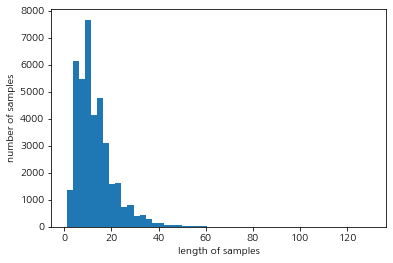

In [ ]:
X_data = sequences
print('댓글 최대 길이 : %d' %max(len(i) for i in X_data))
print('댓글 평균 길이 : %f' % (sum(map(len, X_data)) / len(X_data)))
plt.hist([len(s) for s in X_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 최대 길이 74에 맞추어 Padding 진행

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 74
data = pad_sequences(X_data, maxlen = max_len)
print('훈련 데이터 크기(shape) : ', data.shape)

훈련 데이터 크기(shape) :  (39275, 74)


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((19979, embedding_dim))

for word, i in word_index.items():
  try:
    embedding_vector = model.wv.get_vector(word)
    embedding_matrix[i] = embedding_vector
    
  except KeyError:
    continue

> ## 6. X_train , X_test Split (8 : 2)

In [ ]:
X_test = data[train:] #X_data 데이터 중에서 뒤의 7855개의 데이터만 저장
y_test = np.array(y_data[train:]) #y_data 데이터 중에서 뒤의 7855개의 데이터만 저장
X_train = data[:train] #X_data 데이터 중에서 앞의 31420개의 데이터만 저장
y_train = np.array(y_data[:train]) #y_data 데이터 중에서 앞의 31420개의 데이터만 저장

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[    0     0     0 ...  3104     6   994]
 [    0     0     0 ... 11083     2   111]
 [    0     0     0 ...   479    23    27]
 ...
 [    0     0     0 ...  4404   654 20672]
 [    0     0     0 ...   118    68   338]
 [    0     0     0 ...    27   338   338]]
[[   0    0    0 ...   23   19   99]
 [   0    0    0 ...  194    2   18]
 [   0    0    0 ... 1805    9 3692]
 ...
 [   0    0    0 ...   46  562   20]
 [   0    0    0 ...   37    7   20]
 [   0    0    0 ...    1  918   28]]
[6 6 6 ... 4 4 4]
[4 4 4 ... 4 4 4]


In [ ]:
print(max(map(max, X_train)))

20672


In [ ]:
print(max(map(max, X_test)))

24158


- X_data 정규화

In [ ]:
X_train = X_train.astype(float) / 20672
X_test = X_test.astype(float) / 24158

In [ ]:
print(X_test)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.52065568e-04
  7.86488948e-04 4.09802136e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.03046610e-03
  8.27883103e-05 7.45094793e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.47164500e-02
  3.72547396e-04 1.52827221e-01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.90413114e-03
  2.32635152e-02 8.27883103e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.53158374e-03
  2.89759086e-04 8.27883103e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.13941551e-05
  3.79998344e-02 1.15903634e-03]]


- y_data One_Hot_Encoding을 해야 한다.

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((31420, 74), (31420, 7), (7855, 74), (7855, 7))

> ## 7. RNN Modeling

> ### 1) Define

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras import models
from keras import layers
from keras import backend as K
import tensorflow as tf

In [ ]:
# 필요할 때 쓰기
K.clear_session() 

Case_W2V : 'RNN_HyperParameter.ipynb' 모델 중 좋았던 조합(Case_10) -> Batch_Normalization(Kernel_Regularizer) + Adam(Optimization_method)


In [ ]:
model = Sequential(name = 'RNN_Case_W2V')
model.add(Embedding(5216, 74)) 
model.add(SimpleRNN(64))
model.add(layers.BatchNormalization())
model.add(Dense(7, activation = 'softmax'))
model.summary()

Model: "RNN_Case_W2V"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 74)          385984    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8896      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 395,591
Trainable params: 395,463
Non-trainable params: 128
_________________________________________________________________


> ### 2) Compile 

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

> ### 3) EarlyStopping() & ModelCheckpoint()





In [ ]:
es = EarlyStopping(monitor = 'val_accuracy' ,
                   mode = 'max',
                   patience = 10,
                   verbose = 1)

mc = ModelCheckpoint('RNN_model_with_W2V.h5' ,
                     monitor = 'val_accuracy' ,
                     mode = 'max' ,
                     save_best_only = True ,
                     verbose = 1)

> ### 4) Fit

- Case_W2V : Batch + Adam
  - 약 8분

In [ ]:
%%time
history_W2V = model.fit(X_train, y_train, 
                    epochs = 40, 
                    batch_size = 100, 
                    validation_split = 0.2,
                    callbacks = [es, mc],
                    verbose = 1)

Epoch 1/40
252/252 [==============================] - 16s 63ms/step - loss: 1.6158 - accuracy: 0.2364 - val_loss: 12.2318 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to RNN_model_with_W2V.h5
Epoch 2/40
252/252 [==============================] - 16s 63ms/step - loss: 1.6159 - accuracy: 0.2298 - val_loss: 6.7742 - val_accuracy: 0.6762

Epoch 00002: val_accuracy improved from 0.00000 to 0.67616, saving model to RNN_model_with_W2V.h5
Epoch 3/40
252/252 [==============================] - 16s 63ms/step - loss: 1.6161 - accuracy: 0.2326 - val_loss: 10.1078 - val_accuracy: 0.3238

Epoch 00003: val_accuracy did not improve from 0.67616
Epoch 4/40
252/252 [==============================] - 16s 64ms/step - loss: 1.6162 - accuracy: 0.2335 - val_loss: 3.6000 - val_accuracy: 1.5913e-04

Epoch 00004: val_accuracy did not improve from 0.67616
Epoch 5/40
252/252 [==============================] - 16s 64ms/step - loss: 1.6157 - accuracy: 0.2341 - val

> ### 5) Visualization

- Accuaracy & Loss



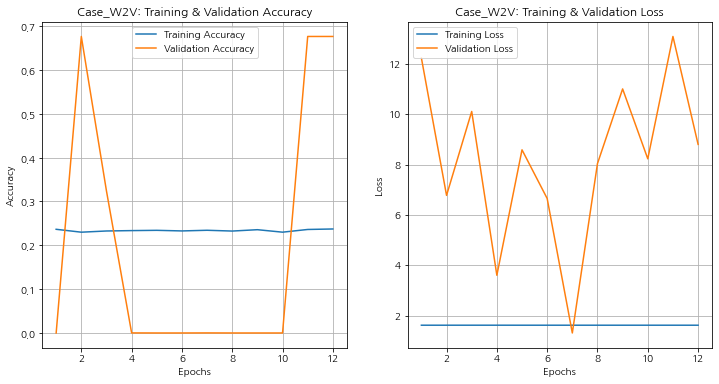

In [ ]:
epochs1 = range(1, len(history_W2V.history['val_accuracy']) + 1)
epochs2 = range(1, len(history_W2V.history['val_loss']) + 1)

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs1, history_W2V.history['accuracy'])
plt.plot(epochs1, history_W2V.history['val_accuracy'])
plt.title('Case_W2V: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs2, history_W2V.history['loss'])
plt.plot(epochs2, history_W2V.history['val_loss'])
plt.title('Case_W2V: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.show()

> ### 6) Predict

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

246/246 [==============================] - 2s 7ms/step - loss: 4.8936 - accuracy: 0.2180
Loss = 4.89363
Accuracy = 0.21795


> ## 8. Test



In [ ]:
def sentiment_predict(sentence):
  sentence = sentence.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣A-Za-z♡ ]', '')
  sentence = khaiii_tokenized(sentence)
  encoded = tokenizer.texts_to_sequences([sentence])
  pad_sentence = pad_sequences(encoded, maxlen=max_len)
  result = model.predict(pad_sentence)
  print(f'공포: {result[0][0]:.5f}')
  print(f'놀람: {result[0][1]:.5f}')
  print(f'분노: {result[0][2]:.5f}')
  print(f'슬픔: {result[0][3]:.5f}')
  print(f'중립: {result[0][4]:.5f}')
  print(f'혐오: {result[0][5]:.5f}')
  print(f'행복: {result[0][6]:.5f}')

In [ ]:
sentence = '♡'
sentiment_predict(sentence)

공포: 0.00000
놀람: 0.00000
분노: 0.00000
슬픔: 0.00000
중립: 0.99623
혐오: 0.00377
행복: 0.00000


> ## 결론 

- 공포(0), 놀람(1), 분노(2), 슬픔(3), 중립(4), 혐오(5), 행복(6)
- Word2Vec을 함께 진행했는데, 성능은 여전히 좋지 않다. 

> ## 9. 모델 저장

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 764567
-rw------- 1 root root   4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root     34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root      4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root  41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root      4096 Mar 19 08:33 003_best_mnist.h7
-rw------- 1 root root  41499744 Mar 23 06:23 003_dogs_and_cats_small.h5
-rw------- 1 root root  39879700 Mar 23 04:48 003_Logo_Data.h5
-rw------- 1 root root  25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748400 Mar 24 07:28 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root  19508640 Apr 15 02:05 best_vanilla.h5
-rw------- 1 root root   1373346 Apr  8 09:25 one_off_conversation_2_bin_result.xlsx
-rw------- 1 root root  58519584 Apr 15 09:13 RNN_model_10.h5
-rw------- 1 root root  58511664 Apr 15 09:15 RNN_model_11.h5
-rw------- 1 root root  39017784 Apr 15 09:05 RNN_model_1.h5
-rw------- 1 root root  3

- ValueError : Weights for model RNN_Case_11 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`. -> 왼쪽 파일탭에 들어와 있었음. 해결

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/RNN_model_with_W2V.h5')

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 782831
-rw------- 1 root root   4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root     34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root      4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root  41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root      4096 Mar 19 08:33 003_best_mnist.h7
-rw------- 1 root root  41499744 Mar 23 06:23 003_dogs_and_cats_small.h5
-rw------- 1 root root  39879700 Mar 23 04:48 003_Logo_Data.h5
-rw------- 1 root root  25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748400 Mar 24 07:28 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root  19508640 Apr 15 02:05 best_vanilla.h5
-rw------- 1 root root   1373346 Apr  8 09:25 one_off_conversation_2_bin_result.xlsx
-rw------- 1 root root  58519584 Apr 15 09:13 RNN_model_10.h5
-rw------- 1 root root  58511664 Apr 15 09:15 RNN_model_11.h5
-rw------- 1 root root  39017784 Apr 15 09:05 RNN_model_1.h5
-rw------- 1 root root  3